In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import os
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

rc_font_size = 30
rc_label_size = 28
rc_legend_size = 26
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['legend.fontsize'] = rc_legend_size
mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.labelsize'] = rc_font_size
mpl.rcParams['xtick.labelsize'] = rc_label_size
mpl.rcParams['ytick.labelsize'] = rc_label_size
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['patch.linewidth'] = 1.5

In [8]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [3]:
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [4]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [5]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

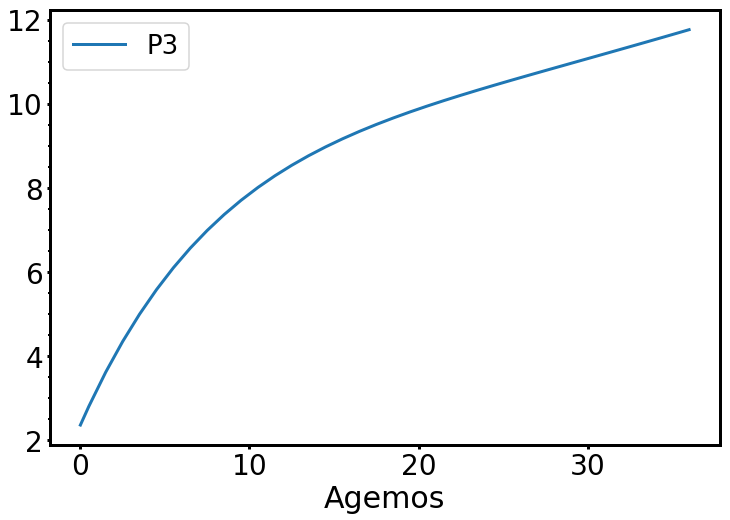

In [19]:
filtrado= tabla_1[tabla_1.Sex==1]
filtrado.plot(x='Agemos', y='P3');

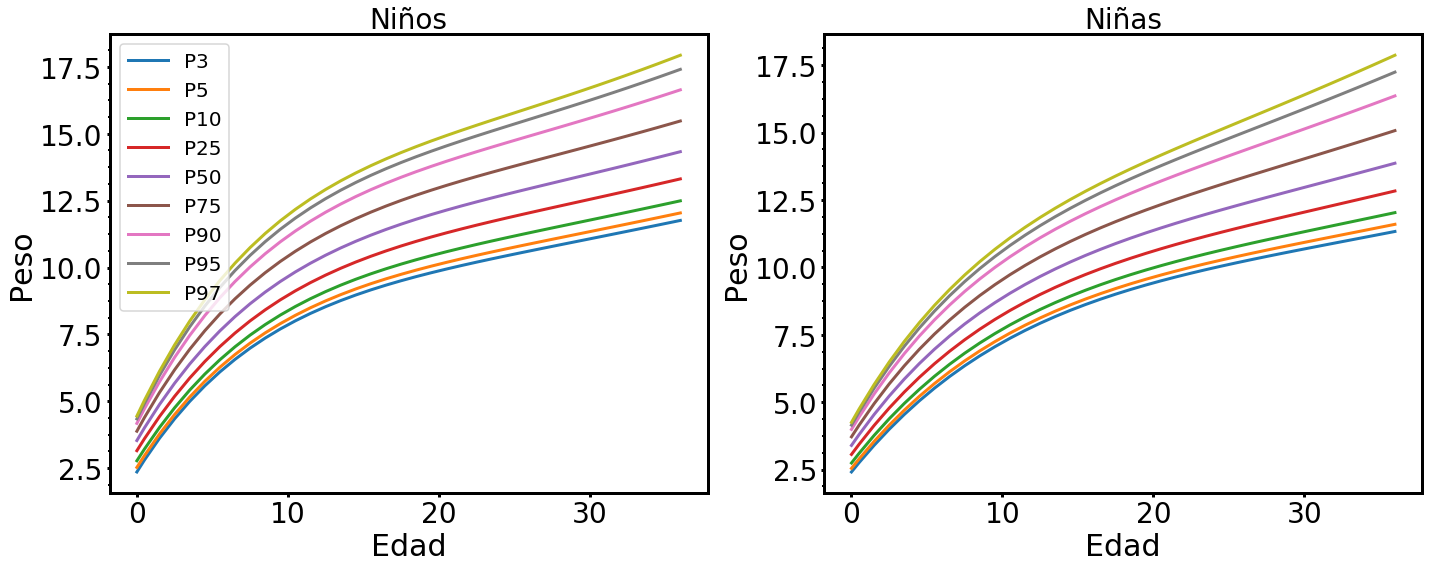

In [33]:
percentiles = ['P{}'.format(p) for p in [3, 5, 10, 25, 50, 75, 90, 95, 97]]

fig, axes = plt.subplots(figsize=(20, 8), ncols=2, nrows=1)

ax = axes[0]
ax.set_title('Niños', fontsize=28)
#tabla_1[tabla_1.Sex==1].plot(x='Agemos', y=percentiles, ax=ax)
data = tabla_1[tabla_1.Sex==1]
for i, p in enumerate(percentiles):
    ax.plot(data['Agemos'], data[p], label=p)
ax.set_ylabel('Peso')
ax.set_xlabel('Edad')
ax.legend(loc='best', fontsize=20)

ax = axes[1]
ax.set_title('Niñas', fontsize=28)
data = tabla_1[tabla_1.Sex==2]
for i, p in enumerate(percentiles):
    ax.plot(data['Agemos'], data[p])
ax.set_ylabel('Peso')
ax.set_xlabel('Edad')

plt.tight_layout()
plt.show()

## Pasos fronterizos

In [10]:
file_name = BASE_DIR + '/input/pasos.json'
pasos = pd.read_json(file_name)
pasos.head()

,location,name,provincia
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz


In [11]:
pasos.provincia.unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Córdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

In [12]:
mask = pasos['provincia'] != 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ'

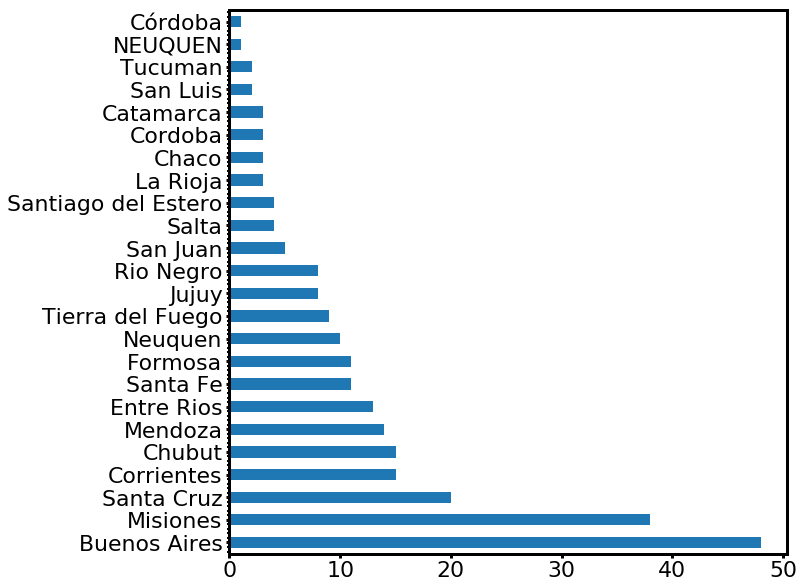

In [13]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
pasos['provincia'][mask].value_counts().plot(kind='barh', ax=ax, fontsize=22)
plt.show()

In [18]:
from gmplot import gmplot
gmap = gmplot.GoogleMapPlotter(-35.2518254, -63.9985026, 5.24)

for loc in pasos.location:
    hidden_gem_lat, hidden_gem_lon = loc
    gmap.marker(hidden_gem_lat, hidden_gem_lon, 'cornflowerblue')

gmap.draw('pasos.html')